<a href="https://colab.research.google.com/github/younghoonNa/ML/blob/main/Dacon/Shopping_Mall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#내 구글 드라이브로 마운트
from google.colab import drive
path = '/content/drive'
drive.mount(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/Shopping_Mall"

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
train = pd.read_csv(path + "/train.csv")
train

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
0,1,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,8.106,False,1643690.90
1,2,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,8.106,True,1641957.44
2,3,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,8.106,False,1611968.17
3,4,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,8.106,False,1409727.59
4,5,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,8.106,False,1554806.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,6251,45,31/08/2012,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,False,734297.87
6251,6252,45,07/09/2012,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,True,766512.66
6252,6253,45,14/09/2012,67.87,3.948,11407.95,NaN,4.30,3421.72,5268.92,8.684,False,702238.27
6253,6254,45,21/09/2012,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,False,723086.20


In [ ]:
train = train.drop('id', axis = 1)
train

,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,8.106,False,1643690.90
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,8.106,True,1641957.44
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,8.106,False,1611968.17
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,8.106,False,1409727.59
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,8.106,False,1554806.68
...,...,...,...,...,...,...,...,...,...,...,...,...
6250,45,31/08/2012,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,False,734297.87
6251,45,07/09/2012,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,True,766512.66
6252,45,14/09/2012,67.87,3.948,11407.95,NaN,4.30,3421.72,5268.92,8.684,False,702238.27
6253,45,21/09/2012,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,False,723086.20


In [ ]:
test = pd.read_csv(path + "/test.csv")
test

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday
0,1,1,05/10/2012,68.55,3.617,8077.89,NaN,18.22,3617.43,3626.14,6.573,False
1,2,1,12/10/2012,62.99,3.601,2086.18,NaN,8.11,602.36,5926.45,6.573,False
2,3,1,19/10/2012,67.97,3.594,950.33,NaN,4.93,80.25,2312.85,6.573,False
3,4,1,26/10/2012,69.16,3.506,2585.85,31.75,6.00,1057.16,1305.01,6.573,False
4,5,2,05/10/2012,70.27,3.617,6037.76,NaN,10.04,3027.37,3853.40,6.170,False
...,...,...,...,...,...,...,...,...,...,...,...,...
175,176,44,26/10/2012,46.97,3.755,38.65,2.61,0.98,NaN,457.74,5.217,False
176,177,45,05/10/2012,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,8.667,False
177,178,45,12/10/2012,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,8.667,False
178,179,45,19/10/2012,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,8.667,False


In [ ]:
submission = pd.read_csv(path + "/sample_submission.csv")
submission

,id,Weekly_Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
175,176,0
176,177,0
177,178,0
178,179,0


In [ ]:
train.isna().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
Promotion1      4153
Promotion2      4663
Promotion3      4370
Promotion4      4436
Promotion5      4140
Unemployment       0
IsHoliday          0
Weekly_Sales       0
dtype: int64

In [ ]:
train['Promotion1'].mean()

7155.930661274976

In [ ]:
train['Promotion2'].mean()

3308.125810301507

In [ ]:
train['Promotion3'].mean()

1462.535522546419

In [ ]:
train['Promotion4'].mean()

3465.952501374382

In [ ]:
train['Promotion5'].mean()

4518.993172576832

In [ ]:
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

In [ ]:
train['year'] = train['Date'].dt.year
train['month'] = train['Date'].dt.month
train['dayofweek'] = train['Date'].dt.dayofweek

test['year'] = test['Date'].dt.year
test['month'] = test['Date'].dt.month
test['dayofweek'] = test['Date'].dt.dayofweek

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6255 entries, 0 to 6254
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6255 non-null   int64         
 1   Date          6255 non-null   datetime64[ns]
 2   Temperature   6255 non-null   float64       
 3   Fuel_Price    6255 non-null   float64       
 4   Promotion1    2102 non-null   float64       
 5   Promotion2    1592 non-null   float64       
 6   Promotion3    1885 non-null   float64       
 7   Promotion4    1819 non-null   float64       
 8   Promotion5    2115 non-null   float64       
 9   Unemployment  6255 non-null   float64       
 10  IsHoliday     6255 non-null   bool          
 11  Weekly_Sales  6255 non-null   float64       
 12  year          6255 non-null   int64         
 13  month         6255 non-null   int64         
 14  dayofweek     6255 non-null   int64         
dtypes: bool(1), datetime64[ns](1), float64

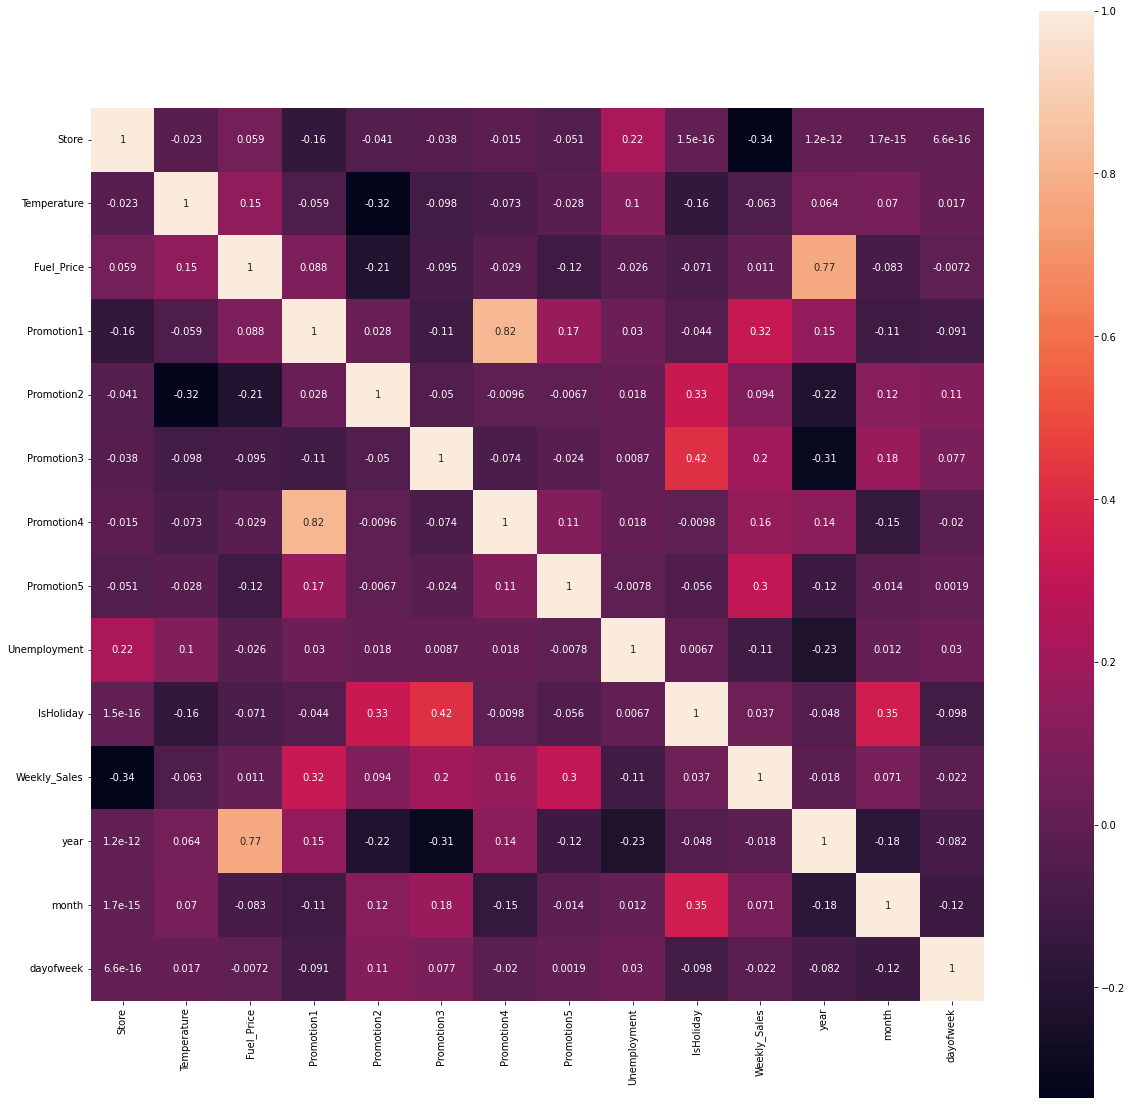

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(figsize=(20,20))
sns.heatmap(train.corr(), mask=np.zeros_like(train.corr(), dtype=bool),
            square=True, annot=True)
plt.show()

In [ ]:
!pip install pycaret[full]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached MarkupSafe-2.1.1-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (25 kB)
  Attempting uninstall: MarkupSafe
    Found existing installation: MarkupSafe 2.0.1
    Uninstalling MarkupSafe-2.0.1:
      Successfully uninstalled MarkupSafe-2.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached MarkupSafe-2.0.1-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (31 kB)
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
from pycaret.regression import *
import jinja2
setup_ = setup(data = train, target = 'Weekly_Sales', session_id=42,  n_jobs = -1, train_size = 0.9, silent =True) 
#Slient를 사용하면 엔터 안쳐줘두 댐

,Description,Value
0,session_id,42
1,Target,Weekly_Sales
2,Original Data,"(6255, 15)"
3,Missing Values,True
4,Numeric Features,9
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(5629, 34)"


In [ ]:
top3 = compare_models(sort='RMSE', n_select=3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,6.505192e+04,1.038465e+10,1.015968e+05,0.9671,0.1033,0.0730,5.856
xgboost,Extreme Gradient Boosting,6.136986e+04,1.052923e+10,1.024631e+05,0.9667,0.0982,0.0658,1.365
lightgbm,Light Gradient Boosting Machine,6.420562e+04,1.130064e+10,1.059140e+05,0.9642,0.1033,0.0699,0.170
et,Extra Trees Regressor,7.997720e+04,1.992006e+10,1.403659e+05,0.9372,0.1236,0.0809,2.281
rf,Random Forest Regressor,7.507999e+04,2.185431e+10,1.474942e+05,0.9311,0.1128,0.0693,3.840
dt,Decision Tree Regressor,9.691240e+04,3.945462e+10,1.979947e+05,0.8751,0.1477,0.0893,0.113
gbr,Gradient Boosting Regressor,1.630084e+05,4.673579e+10,2.159083e+05,0.8522,0.2562,0.2161,0.726
knn,K Neighbors Regressor,2.842294e+05,1.608975e+11,4.009373e+05,0.4911,0.4138,0.3605,0.226
ada,AdaBoost Regressor,4.170971e+05,2.358984e+11,4.854273e+05,0.2536,0.5695,0.6436,0.413
llar,Lasso Least Angle Regression,4.109705e+05,2.546340e+11,5.044920e+05,0.1944,0.5469,0.5743,0.045


In [ ]:
tuned_top5 = [tune_model(i,n_iter = 10) for i in top3]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,63008.4743,1.240591e+10,111381.8005,0.9620,0.1090,0.0700
1,59974.2880,8.545774e+09,92443.3578,0.9708,0.0936,0.0655
2,68391.5131,1.237701e+10,111252.0334,0.9627,0.1113,0.0762
3,63792.5644,1.164229e+10,107899.4434,0.9601,0.1104,0.0731
4,59957.0014,8.050917e+09,89726.9046,0.9740,0.0862,0.0624
5,63236.7565,9.223534e+09,96039.2323,0.9692,0.1139,0.0786
6,61260.3296,9.807554e+09,99033.0974,0.9692,0.1030,0.0667
7,63698.9229,9.251870e+09,96186.6398,0.9729,0.1030,0.0722
8,62443.2301,1.066150e+10,103254.5405,0.9679,0.1042,0.0693


In [ ]:
blender_top5 = stack_models(estimator_list=tuned_top5,optimize='RMSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,59605.3897,1.075642e+10,103713.1575,0.9671,0.1052,0.0653
1,55918.4081,7.139959e+09,84498.2797,0.9756,0.0856,0.0599
2,62903.8698,1.058690e+10,102892.6702,0.9681,0.1072,0.0699
3,60454.8856,1.031868e+10,101580.8830,0.9646,0.1003,0.0669
4,59281.8037,7.863563e+09,88676.7349,0.9746,0.0815,0.0593
5,54918.6235,7.162318e+09,84630.4810,0.9761,0.0968,0.0645
6,59392.6122,9.159977e+09,95707.7669,0.9712,0.1006,0.0636
7,55522.3175,6.871902e+09,82896.9349,0.9799,0.0938,0.0631
8,58549.8000,9.100720e+09,95397.6947,0.9726,0.1034,0.0634


In [ ]:
final_model = finalize_model(blender_top5)

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 

In [ ]:
prediction = predict_model(final_model, data=test)

In [ ]:
prediction['Label'].astype('str')

0       1238359.004054554
1      1690065.3943780214
2      1264094.3760572847
3       1182008.404552002
4      1152295.4981120918
              ...        
175     614743.9038415924
176    521595.03970133536
177     932250.8281067458
178     587851.9491751102
179      593465.205319958
Name: Label, Length: 180, dtype: object

In [ ]:
Target = round(prediction['Label'])

In [ ]:
submission['Weekly_Sales'] = Target

In [ ]:
submission.to_csv("result.csv", index = False)